**Important: This code will be done without any feature engineering. We are only focused on the concepts of model selection and optimizations.**

## **Cross validation**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('pima-indians-diabetes.csv')
print(data.shape)
data.head()

(768, 9)


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = data.drop(columns='class', axis=1)
y = data['class']

In [4]:
k = 10

kfold = KFold(n_splits=k, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=500)
results = cross_val_score(model, X, y, cv=kfold)
print(results)
print('Accuracy: %.3f%% (%.3f%%)' % (results.mean()*100, results.std()*100))

[0.7012987  0.80519481 0.72727273 0.84415584 0.83116883 0.67532468
 0.85714286 0.77922078 0.69736842 0.78947368]
Accuracy: 77.076% (6.270%)


Our model perform on average 77%. And could vary between 70.806% and 83.346%. 

## **Leave one out cross validation**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [6]:
data = pd.DataFrame({'x1': [2, 5, 4, 3, 4, 6, 7, 5, 8, 9],
                     'x2': [14, 12, 12, 13, 7, 8, 7, 4, 6, 5],
                     'y': [6, 8, 12, 14, 14, 15, 17, 22, 24, 23]})

data

,x1,x2,y
0,2,14,6
1,5,12,8
2,4,12,12
3,3,13,14
4,4,7,14
5,6,8,15
6,7,7,17
7,5,4,22
8,8,6,24
9,9,5,23


In [7]:
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]

In [8]:
# cross validation method

cv = LeaveOneOut()

In [9]:
model = LinearRegression()

In [10]:
# using LOOCV to evaluate the model

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1) 

In [11]:
# Mean Absolute Error

mean(absolute(scores))

3.1461548083469735

## **GridSearchCV for model optimizations**

In [12]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split 

In [13]:
data = pd.read_csv('pima-indians-diabetes.csv')
print(data.shape)
data.head()

(768, 9)


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X = data.drop('class', axis=1)
y = data['class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the validation data from the training data

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [20]:
print('Total dataset:', len(data.values))
print('Total test data:', len(X_test))
print('Total training data:', len(X_train2))
print('Total validation data:', len(X_val))

Total dataset: 768
Total test data: 154
Total training data: 460
Total validation data: 154


In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [22]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [23]:
param_grid = {'n_neighbors': list(range(1,9)),
              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size': [10,20,30,40,50],
              'weights': ('uniform', 'distance')
              }

In [24]:
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(knn_clf, param_grid, cv=20)

In [25]:
GS.fit(X_train2, y_train2)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],
                         'weights': ('uniform', 'distance')})

In [26]:
GS.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 8, 'weights': 'uniform'}

In [27]:
GS.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=8)

In [28]:
GS.cv_results_['mean_test_score']

array([0.66521739, 0.66521739, 0.68695652, 0.66521739, 0.69347826,
       0.69130435, 0.69347826, 0.68695652, 0.72173913, 0.70869565,
       0.72173913, 0.70869565, 0.72173913, 0.72826087, 0.7326087 ,
       0.72608696, 0.66521739, 0.66521739, 0.68695652, 0.66521739,
       0.69347826, 0.69130435, 0.69347826, 0.68695652, 0.72173913,
       0.70869565, 0.72173913, 0.70869565, 0.72173913, 0.72826087,
       0.7326087 , 0.72608696, 0.66521739, 0.66521739, 0.68695652,
       0.66521739, 0.69347826, 0.69130435, 0.69347826, 0.68695652,
       0.72173913, 0.70869565, 0.72173913, 0.70869565, 0.72173913,
       0.72826087, 0.7326087 , 0.72608696, 0.66521739, 0.66521739,
       0.68695652, 0.66521739, 0.69347826, 0.69130435, 0.69347826,
       0.68695652, 0.72173913, 0.70869565, 0.72173913, 0.70869565,
       0.72173913, 0.72826087, 0.7326087 , 0.72608696, 0.66521739,
       0.66521739, 0.68695652, 0.66521739, 0.69347826, 0.69130435,
       0.69347826, 0.68695652, 0.72173913, 0.70869565, 0.72173

In [29]:
GS.best_score_

0.7326086956521739

In [30]:
# Exporting the results to evaluate which one was the best result

df = pd.DataFrame(GS.cv_results_)
df = df.sort_values('rank_test_score')
df.to_csv('cv_results.csv', encoding='utf-8', sep=',')

In [31]:
# Making the model with the best hyper parameters

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=8, weights='uniform')

In [32]:
knn_clf.fit(X_train2, y_train2)

KNeighborsClassifier(leaf_size=10, n_neighbors=8)

In [33]:
from sklearn import metrics

# Since we don't wanna go back and change any parameters we can use the test data now otherwise we need
# to use the validation data to check

y_pred = knn_clf.predict(X_val)

In [34]:
print('Accuracy: ', metrics.accuracy_score(y_val, y_pred))

Accuracy:  0.7532467532467533


In [35]:
# Changing more hyper parameters to see if the accuracy score get better

param_grid2 = {'n_neighbors': list(range(1,12)),
              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size': [5,10,20,30,40,50,60],
              'weights': ('uniform', 'distance')
              }


In [36]:
from sklearn.model_selection import GridSearchCV

GS2 = GridSearchCV(knn_clf, param_grid2, cv=20)

In [37]:
GS2.fit(X_train2, y_train2)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(leaf_size=10, n_neighbors=8),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [5, 10, 20, 30, 40, 50, 60],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'weights': ('uniform', 'distance')})

In [38]:
GS2.best_params_

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 11, 'weights': 'distance'}

In [39]:
GS2.best_estimator_

KNeighborsClassifier(leaf_size=5, n_neighbors=11, weights='distance')

In [40]:
GS2.best_score_

0.7347826086956522

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf2 = KNeighborsClassifier(algorithm='auto', leaf_size=5, n_neighbors=11, weights='distance')

In [42]:
knn_clf2.fit(X_train2, y_train2)

KNeighborsClassifier(leaf_size=5, n_neighbors=11, weights='distance')

In [43]:
from sklearn import metrics

y_pred2 = knn_clf2.predict(X_val)

In [44]:
print('Accuracy: ', metrics.accuracy_score(y_val, y_pred2))

Accuracy:  0.7727272727272727


In [45]:
# Since we don't wanna go back and change any parameters we can use the test data now otherwise we need
# to use the validation data to check

y_pred3 = knn_clf2.predict(X_test)

In [46]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred3))

Accuracy:  0.7402597402597403


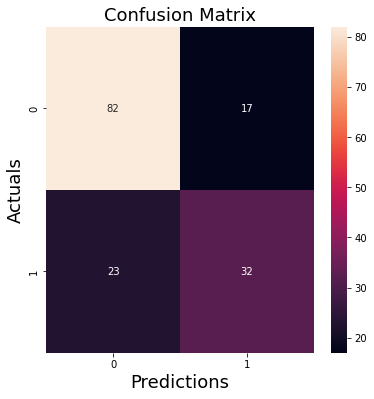

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix = confusion_matrix(y_test,y_pred3)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True)
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [48]:
# Our model is good in detecting the '0's but is not doing good in detecting the '1's
# maybe we need to tune the hyper parameters again to make it better 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        99
           1       0.65      0.58      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [49]:
# Computing the ROC and the AOC for the first model

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_scores = knn_clf.predict_proba(X_test)
fpr1, tpr1, threshold1 = roc_curve(y_test, y_scores[:, 1])
roc_auc1 = auc(fpr1, tpr1)

In [50]:
# Computing the ROC and the AOC for the second model

y_scores2 = knn_clf2.predict_proba(X_test)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_scores2[:, 1])
roc_auc2 = auc(fpr2, tpr2)

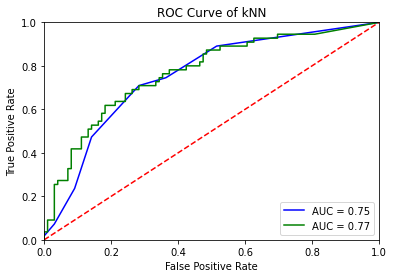

In [51]:
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## **GridSearchCV with pipeline**

In [52]:
data = pd.read_csv('wisc_bc_data.csv')
print(data.shape)
data.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [53]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [55]:
y = le.fit_transform(y)

In [56]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [57]:
from sklearn.model_selection import cross_val_score, train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the validation data from the training data

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [58]:
print('Total dataset:', len(data.values))
print('Total test data:', len(X_test))
print('Total training data:', len(X_train2))
print('Total validation data:', len(X_val))

Total dataset: 569
Total test data: 114
Total training data: 341
Total validation data: 114


### **Implementing pipeline**

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [71]:
pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('svc', SVC())])

In [72]:
pipe_svc.fit(X_train2, y_train2)
print('Test accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test accuracy: 0.939


In [69]:
print(PCA().get_params())

{'copy': True, 'iterated_power': 'auto', 'n_components': None, 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}


In [68]:
print(SVC().get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [75]:
param_grid = {'pca__n_components': [14,15],
              'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__kernel': ['rbf', 'poly']}

In [76]:
grid = GridSearchCV(pipe_svc, param_grid=param_grid, cv=5)

In [77]:
grid.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('svc', SVC())]),
             param_grid={'pca__n_components': [14, 15],
                         'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['rbf', 'poly']})

In [80]:
print('Best cross-validation accuracy: {:.2f}'.format(grid.best_score_))
print('Best parameters: ', grid.best_params_)
print('Test set accuracy: {:.2f}'.format(grid.score(X_val, y_val)))

Best cross-validation accuracy: 0.97
Best parameters:  {'pca__n_components': 15, 'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Test set accuracy: 0.94
